## Network Analytics
The visualisation of asset correlations through network analysis using NetworkX by Jaume Clave  
February 28rd, 2020

### Index
[NetworkX Asset Price Correlation Analysis](#NetworkX-Asset-Price-Correlation-Analysis)  
i. [Project Summary](#Project-Summary)  
ii. [Correlation Matrix](#Correlation-Matrix)  
iii. [Plotting the Matrix as a Network using NetworkX](#Plotting-the-Matrix-as-a-Network-using-NetworkX)  
iv. [Network/Plot Enhancements for Increased Interpretability](#Network/Plot-Enhancements-for-Increased-Interpretability)  

[The nxviz Package](#The-nxviz-Package)  

[Conclusion](#Conclusion)  
[Further Reading](#Further-Reading)

### NetworkX Asset Price Correlation Analysis
### Project Summary  
This is based on the data file called HW1_asset_prices.csv. This represents the price movements of a
set of assets (bonds, stocks, etc). Firstly the data will be imported and manipulated so a correlation matrix may be formed and explored. Following the matrix will be plotted to show the correlation between nodes (assets), the network visualisation will be enhaned using the the matplotlib.pyplot interface in NetworkX. Finally a third-party package called Nxviz will be used to display more network layouts in order to increase interpretability.

### Correlation Matrix 
The correlation matrix is created to initally visually see how assets are correlated. In this section the data is loaded and manipulated and a correlation matrix is created. This matrix is improved using various techniques in order to extract the most amount of information for the viewer.

In [1]:
## Import necessary packages
import numpy as np 
import pandas as pd 
import networkx as nx 
import seaborn as sn 
%matplotlib inline
import matplotlib.pyplot as plt
import nxviz as nv
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read Asset Price csv file and create Pandas Dataframe
data = pd.read_csv(
    r"C:\Users\Jaume\Documents\ICBS - MSc Business Analytics\Network Analytics\Homework 1\HW1_asset_prices.csv")
data_shape = data.shape 

## Print dimensions of data
print(f"There are {data_shape[0]} rows and {data_shape[1]} columns in the dataset")
print(
    f"This dataset ranges from {min(data['Date'])} to {max(data['Date'])}. In total it spans {pd.to_datetime(max(data['Date'])) - pd.to_datetime(min(data['Date']))}")

There are 1013 rows and 40 columns in the dataset
This dataset ranges from 2013-11-01 to 2017-11-08. In total it spans 1468 days 00:00:00


It is important to rename assets using their respective ETF codes to listed name for interpretability. Names of assets and their tickers have been sourced from the etfdb.com website where codes, names, categories, live prices, assets and tikcers are listed.

In [3]:
## Asset rename
names = pd.read_csv(r"C:\Users\Jaume\Documents\ICBS - MSc Business Analytics\Network Analytics\Homework 1\etf_code_names.csv")
names = dict(zip(names['Code'], names['ETF Name']))
asset_price_df = data.rename(columns=names)

A correlation matrix is table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables, here two types of assets. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. In the case of assets, this is quite frequently used by investors trying to understand to understand risk, as well as (hopefully) find correlation to lagged asset prices for investing.


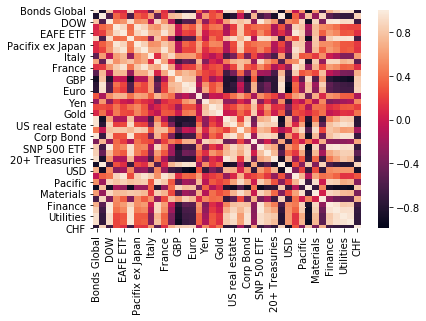

In [4]:
## Correlation matrix
corr_matrix = asset_price_df.corr()
sn.heatmap(corr_matrix)
plt.show()

In order to visualise the correlation matrix better, it is important to normalize the dataset and convert the asset prices into daily returns. When financial investors look at this information they are interested in returns on set assets rather than the current EOD price that is shown. Normalizing already changes the correlation matrix plotted above


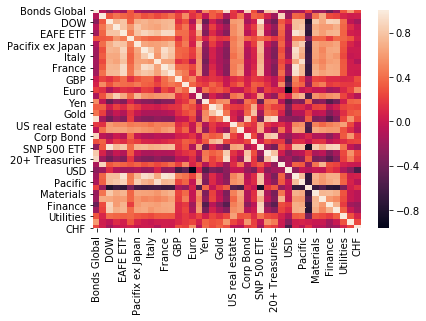

In [5]:
## Data Normalisation
log_returns_df =  pd.DataFrame()

for asset in asset_price_df.drop('Date', axis = 1):
    log_returns_df[asset] = np.log(asset_price_df[asset]).diff(-1)

log_returns_df = pd.concat([asset_price_df['Date'], log_returns_df], axis = 1)

log_corr_matrix = log_returns_df.corr()

sn.heatmap(log_corr_matrix)
plt.show()

The correlation matrix can further be improved using Seaborns clustermap function to visualise the corr_matrix as a heatmap and similarly cluster ETFs which exhibit similar behaviour close to one another.


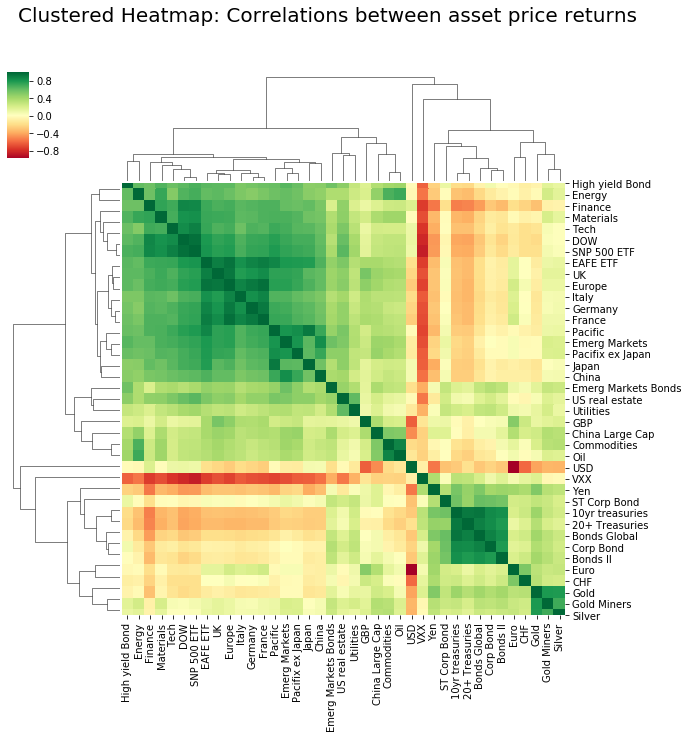

In [6]:
## Creating a clusterplot
sn.clustermap(log_corr_matrix, cmap = "RdYlGn")
plt.title('Clustered Heatmap: Correlations between asset price returns', 
          {'horizontalalignment' : 'left'}, size = 20, pad = 50)
plt.show()

### Plotting the Matrix as a Network using NetworkX
This section uses the normalized asset correlation matrix to plot various graph layouts using NetworkX. Various NetworkX functions are used to add edges to a graph which is plotted. Further improvments are made to the graph, such as the removal of edges which did not correspond to a sucfficiently high correlation. This was done to improve interpretability.

In [7]:
log_corr_matrix.head(10)

Bonds Global  Commodities       DOW  Emerg Markets  \
Bonds Global             1.000000    -0.086234 -0.279161      -0.069623   
Commodities             -0.086234     1.000000  0.305137       0.428909   
DOW                     -0.279161     0.305137  1.000000       0.719260   
Emerg Markets           -0.069623     0.428909  0.719260       1.000000   
EAFE ETF                -0.177521     0.369637  0.793387       0.796425   
Emerg Markets Bonds      0.296679     0.313791  0.343817       0.580454   
Pacifix ex Japan        -0.104739     0.400316  0.688344       0.815049   
Germany                 -0.188547     0.283711  0.722882       0.697222   
Italy                   -0.201014     0.331083  0.666315       0.660268   
Japan                   -0.159231     0.250509  0.691672       0.638955   

                     EAFE ETF  Emerg Markets Bonds  Pacifix ex Japan  \
Bonds Global        -0.177521             0.296679         -0.104739   
Commodities          0.369637             0.313791          0.400316   
DOW                  0.793387             0.343817          0.688344   
Emerg Markets        0.796425             0.580454          0.815049   
EAFE ETF             1.000000             0.466883          0.790699   
Emerg Markets Bonds  0.466883             1.000000          0.481680   
Pacifix ex Japan     0.790699             0.481680          1.000000   
Germany              0.884385             0.394289          0.650267   
Italy                0.830052             0.349381          0.611764   
Japan                0.785198             0.359046          0.624245   

                      Germany     Italy     Japan  ...    Europe   Pacific  \
Bonds Global        -0.188547 -0.201014 -0.159231  ... -0.181249 -0.141707   
Commodities          0.283711  0.331083  0.250509  ...  0.367019  0.341089   
DOW                  0.722882  0.666315  0.691672  ...  0.765251  0.769604   
Emerg Markets        0.697222  0.660268  0.638955  ...  0.763111  0.811155   
EAFE ETF             0.884385  0.830052  0.785198  ...  0.949368  0.872972   
Emerg Markets Bonds  0.394289  0.349381  0.359046  ...  0.445771  0.460647   
Pacifix ex Japan     0.650267  0.611764  0.624245  ...  0.725281  0.842749   
Germany              1.000000  0.836259  0.630698  ...  0.930440  0.713506   
Italy                0.836259  1.000000  0.573502  ...  0.884922  0.656898   
Japan                0.630698  0.573502  1.000000  ...  0.664591  0.929396   

                          VXX  Materials    Energy   Finance      Tech  \
Bonds Global         0.222886  -0.220603 -0.198536 -0.420264 -0.197672   
Commodities         -0.224835   0.429541  0.677430  0.257454  0.225463   
DOW                 -0.797538   0.817422  0.655544  0.874902  0.849271   
Emerg Markets       -0.668680   0.674630  0.607172  0.606749  0.686458   
EAFE ETF            -0.721559   0.720030  0.610561  0.711714  0.725415   
Emerg Markets Bonds -0.367977   0.363595  0.374849  0.204463  0.386700   
Pacifix ex Japan    -0.625294   0.649574  0.570528  0.588417  0.642502   
Germany             -0.660442   0.638784  0.506053  0.651597  0.668129   
Italy               -0.627088   0.627747  0.535270  0.633116  0.579117   
Japan               -0.615155   0.574842  0.497811  0.609195  0.636318   

                     Utilities  ST Corp Bond       CHF  
Bonds Global          0.301774      0.598105  0.250142  
Commodities           0.089290      0.028872  0.042324  
DOW                   0.395247     -0.042967 -0.172730  
Emerg Markets         0.365031      0.123624 -0.018461  
EAFE ETF              0.352270      0.050121  0.021760  
Emerg Markets Bonds   0.368832      0.299430  0.070316  
Pacifix ex Japan      0.306977      0.089201 -0.006725  
Germany               0.285592      0.020280  0.020124  
Italy                 0.255322     -0.006330  0.013613  
Japan                 0.314615      0.038336 -0.098842  

[10 rows x 39 columns]

In order to create a network a new dataframe must be created. This dataframe will contain a source node a target node and a weight of the edge between the two. This is represented by asset 1, asset 2 and their correlation, respectively. 


In [8]:
## Creating a pandas DF
edges = log_corr_matrix.stack().reset_index()
edges.columns = ['asset_1', 'asset_2', 'weight']

edges = edges.loc[edges['asset_1'] != edges['asset_2']].copy()
edges.head()

asset_1              asset_2    weight
1  Bonds Global          Commodities -0.086234
2  Bonds Global                  DOW -0.279161
3  Bonds Global        Emerg Markets -0.069623
4  Bonds Global             EAFE ETF -0.177521
5  Bonds Global  Emerg Markets Bonds  0.296679

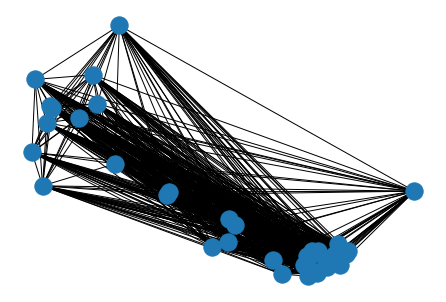

In [9]:
## Create first network using cleaned edges pandas dataframe
G0 = nx.from_pandas_edgelist(edges, 'asset_1', 'asset_2', edge_attr = 'weight')
nx.draw(G0)

The graph above is not visually attractive and shows little information as there are not labled and there is over crowding. More graphs using NetworkX graph layouts are explored below


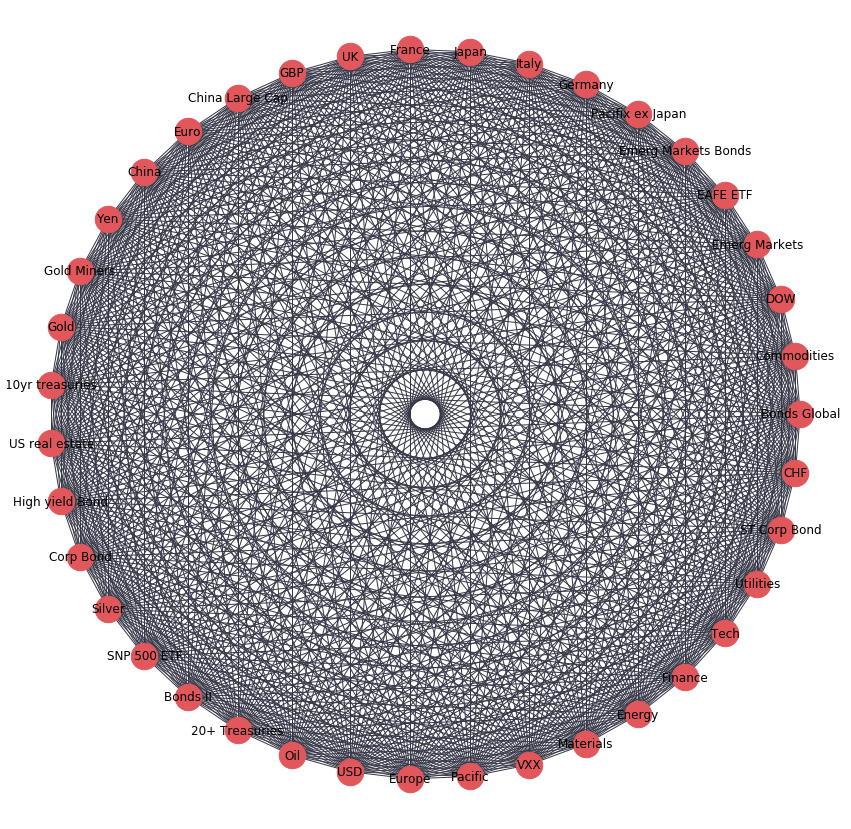

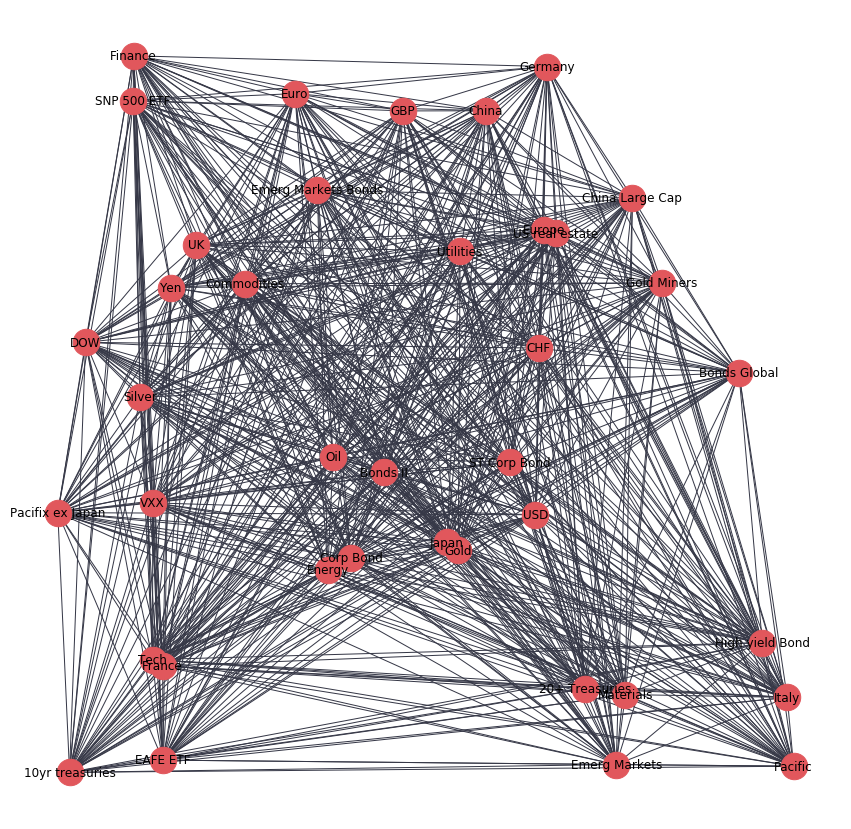

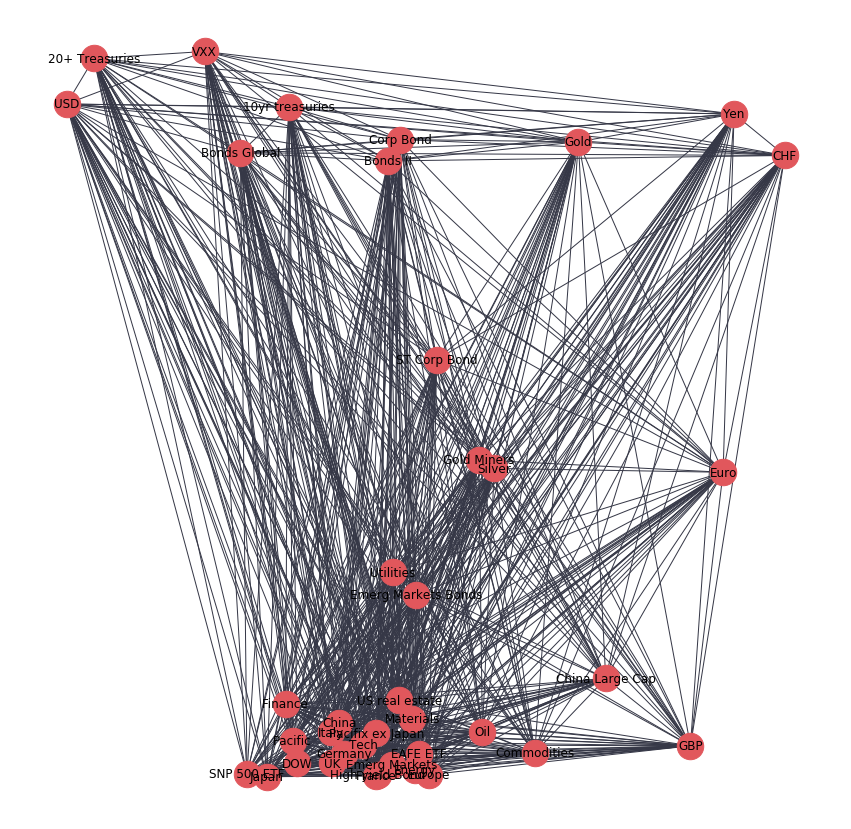

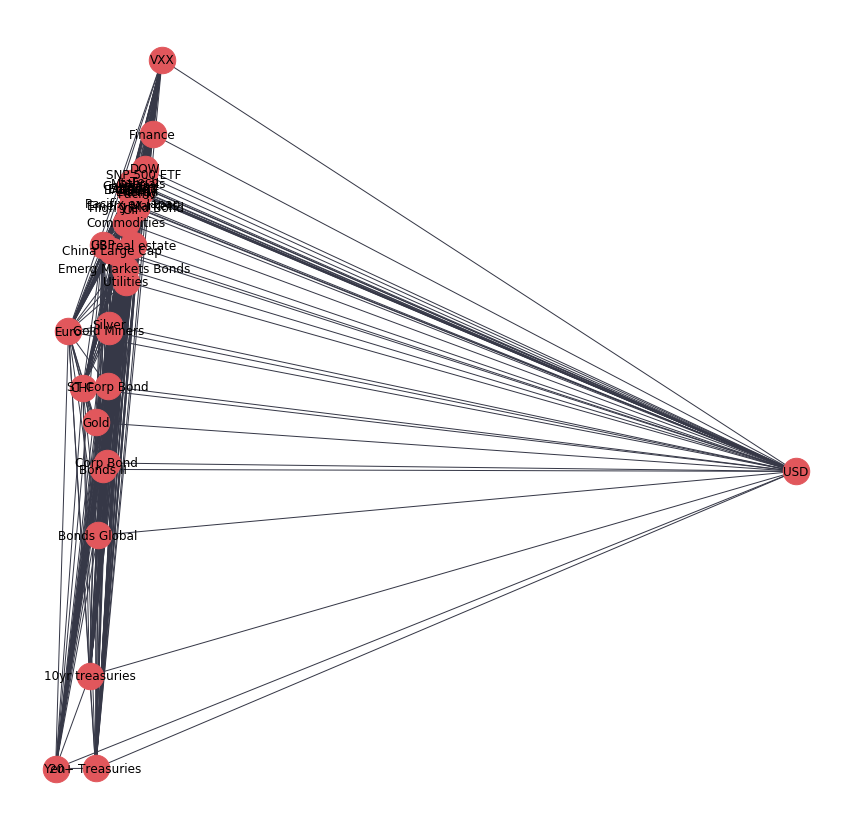

In [10]:
## The following code will explore various different tyeps of graph layouts
graph_layouts = [nx.circular_layout(G0), nx.random_layout(G0), nx.spring_layout(G0), nx.spectral_layout(G0)]

for graph in graph_layouts:
        plt.subplots(figsize=(15, 15))
        nx.draw(G0, with_labels = True, node_size = 700, node_color = "#e1575c", edge_color = '#363847',  pos = graph)

If I had to chose a graph layout, out of the four above, that is best for visualizing the correlations between each assests it would be the circular_layout. The circular_layout is the layout with the least cluttered nodes as they are all evenly spaced out. It is the most organised graph and makes visualsing the correlations slighly easier than the rest. The layout needs to be drastically improved for it to be useful and this will be done by coloring edges based on correlation, changing the size of the nodes based on count of strong correlations.

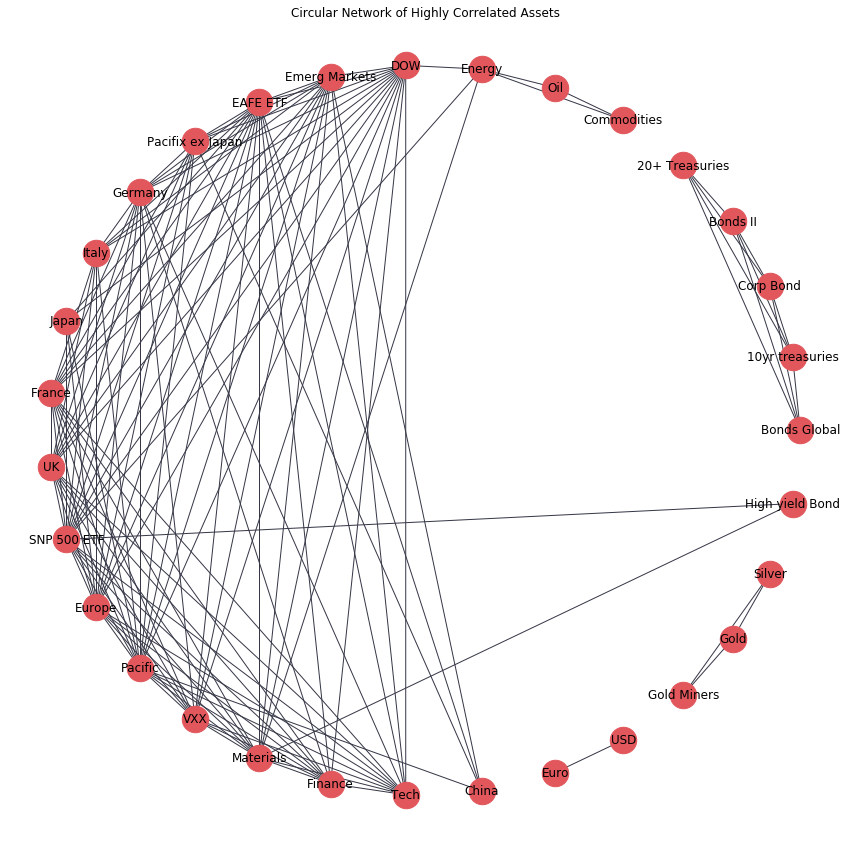

In [11]:
## Lets start by only keeping edges which related to highly postively or negaitvely correlated assets
corr_thresh = 0.65

weak_corr_edges = [x for x in edges['weight'] if abs(x) < corr_thresh]
strong_corr_edges_df = edges[~edges['weight'].isin(weak_corr_edges)]

G1 = nx.from_pandas_edgelist(strong_corr_edges_df, 'asset_1', 'asset_2', edge_attr = 'weight')

plt.subplots(figsize=(15, 15))
plt.title('Circular Network of Highly Correlated Assets')
nx.draw(G1, with_labels = True, node_size = 700, node_color = "#e1575c", edge_color = '#363847',  pos = nx.circular_layout(G1))

### Network/Plot Enhancements for Increased Interpretability
This section aims to improve the circular layout above by adding color to each node depending on its positive or negative correlation, add thickness to each edge depending on its absolute value of correlation, the ticker the stronger the correlation, and change the size of the nodes to show which nodes have the most correlations (edges). This is entirely done with the networkx package along with the matplotlib.pyplot interface. Below this section, is another that explores the same enhacment process with a third-party package called nxviz.

Using the final circular network plotted in question 2, this section will imporve that plot by representing the thickness of the edges and size of the nodes in order to provide further insight. Firstly functions need to be created to color each edge based on its correlation (green for postive, red for negative), the thickness of the edge will be scaled depending on the absolute value of its correlation and the node size will be changed depending on its degree.


In [12]:
## Creating functions to change the weight and color of nodes on the new imporved asset correlation plot
def node_size(degree, scaling = 75):
    return degree * scaling

def edge_color(weight):
    if weight <= 0:
        return "crimson"
    else:
        return "forestgreen"

def edge_thickness(weight, default_thickness = 3, scaling = 3):
    return default_thickness * abs(weight) ** scaling

node_sizes = []

for node, degree in dict(G1.degree).items():
    node_sizes.append(node_size(degree))

edge_colors = []
edge_thicknesses = []

for edge, weight in nx.get_edge_attributes(G1, 'weight').items():
    edge_colors.append(edge_color(weight))
    edge_thicknesses.append(edge_thickness(weight))

Using the functions created above for scaling, thickness and color, a new and improved circular graph which will more easily show information regarding asset correlation


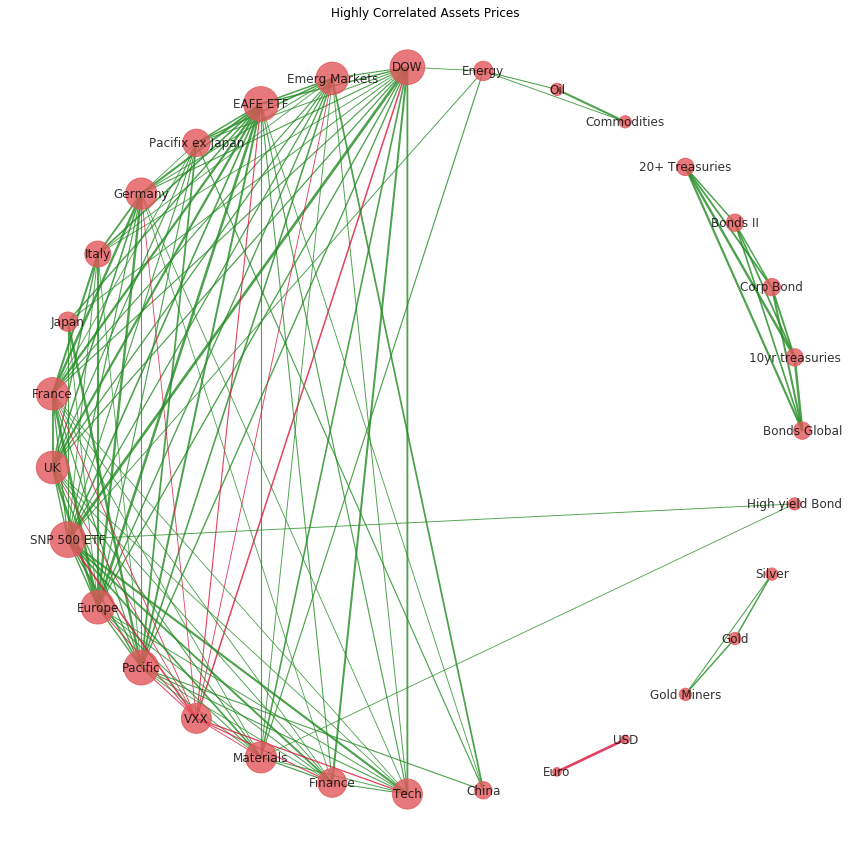

In [13]:
## Plotting the visualisation
G2 = nx.from_pandas_edgelist(strong_corr_edges_df, 'asset_1', 'asset_2', edge_attr = 'weight')
plt.subplots(figsize=(15, 15))
nx.draw(G2, with_labels = True, node_size = node_sizes, node_color = '#e1575c', 
        edge_color = edge_colors, width = edge_thicknesses, pos = nx.circular_layout(G1), alpha = 0.8)
plt.title('Highly Correlated Assets Prices')
plt.show()

## The nxviz Package
nxviz is a graph visualization package for NetworkX created by Eric J. Ma. With nxviz, you can create beautiful graph visualizations by a
declarative API. The nxviz package will be used for the remainder of this exercise to provide new and further insight into asset correlation.

In [14]:
## A new graph object will be created for this exploration. 
G3 = nx.from_pandas_edgelist(strong_corr_edges_df, 'asset_1', 'asset_2', edge_attr = 'weight')

An Arc Plot is a transformation of the node-link diagram layout, in which nodes are ordered along one axis of the plot, and edges are drawn using circular arcs from one node to another. Arc plots are a good starting point for visualization of a network as they form the basis of the later plots looked at.


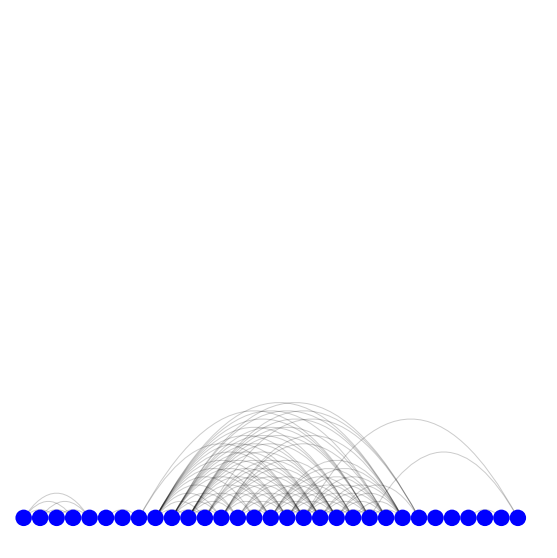

In [15]:
## ArcPlot
a = nv.ArcPlot(G3, figsize=(15, 10))
a.draw()

A Circos Plot is a transformation of the Arc Plot, such that the two ends of the Arc Plot re joined together in a circle. 

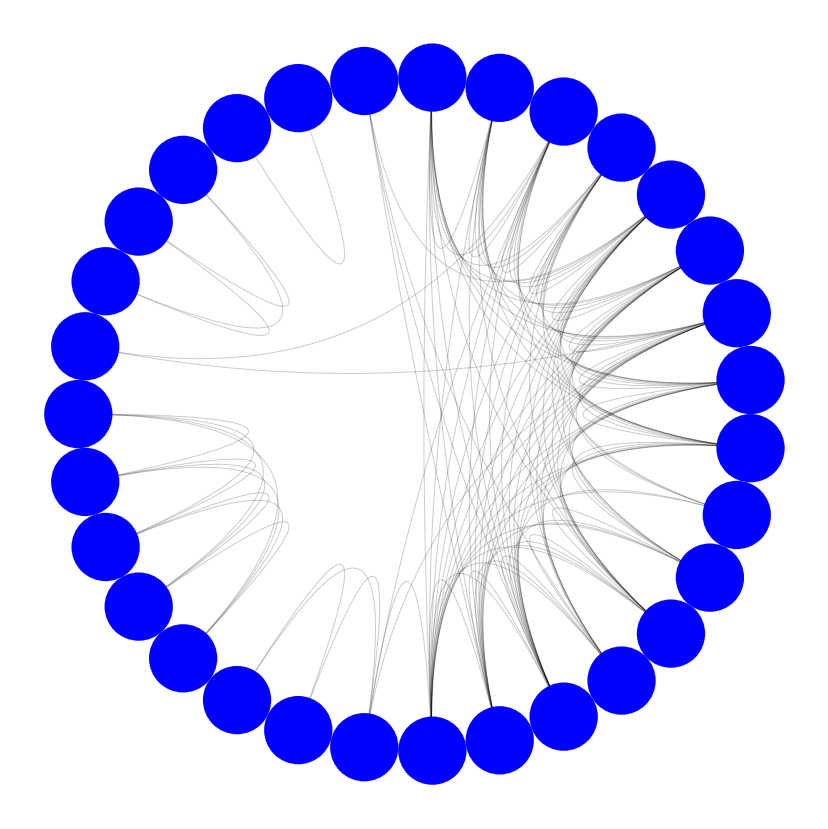

In [16]:
## CircosPlot
c = nv.CircosPlot(G3, figsize=(15, 15))
c.draw()

Both the ArcPlot and the CircosPlot above need to be improved and enhanced in order to increase interpetability and allow people to make sense of them. This will be done by coloring the nodes based on the asset category labled by ETF, adding color to the edges based on a positive or negative correlation and add the size of node based on its degree

In [17]:
## Improving the visualisation using nxviz
## Create new dataframe with edge color attribute
strong_corr_edges_df_G4 = strong_corr_edges_df.copy()
strong_corr_edges_df_G4['color'] = np.where(strong_corr_edges_df['weight'] <= 0, 'yellow', 'forestgreen') 

## The first step is to create and attribute for each node labeled 'category' by ETF standard
bonds = ['Bonds Global', 'High yield Bond', 'Corp Bond', '20+ Treasuries', 'Bonds II', '10yr treasuries']
commodities = ['Commodities', 'Gold', 'Silver', 'Oil']
equities = ['Emerg Markets', 'EAFE ETF', 'Pacifix ex Japan', 'Germany', 'Italy', 'Japan', 
            'France', 'UK', 'China', 'Gold Miners', 
            'SNP 500 ETF', 'Europe', 'Pacific', 'Materials', 'Energy', 'Finance', 'Tech', 'DOW']
currencies = ['Euro', 'USD']
volatilities = ['VXX']

G4 = nx.from_pandas_edgelist(strong_corr_edges_df_G4, 'asset_1', 'asset_2', edge_attr = ['weight', 'color'])

def asset_type(asset):
    if asset in bonds:
        return 'bond'
    if asset in commodities:
        return 'commodity'
    if asset in equities:
        return 'equity'
    if asset in currencies:
        return 'currency'
    if asset in volatilities:
        return 'volatiltiy'

def add_tag(G,fnode,attr,value):
    for node in G:
        if node == fnode:
           attrs = {fnode : {attr : value}}
           nx.set_node_attributes(G, attrs)

total = equities + commodities + volatilities + bonds + currencies

for asset in total:
    add_tag(G4, asset, 'category', asset_type(asset))

## The next step is to add an attribute to each node labled 'degree' which counts the amount of edges the node has
for n, d in G4.nodes(data = True):
    G4.node[n]['degree'] = nx.degree(G4, n)

#print(G4.nodes(data = True))
#print(G4.edges(data = True))

The ArcPlot is improved by ordering it by node degree, colors are added to the nodes to deonte the categories explored above, the nodes are sized by node degree and color of edges show correlations. This is done to visualize the relationship between the connectivity and the sorted (or grouped) property.


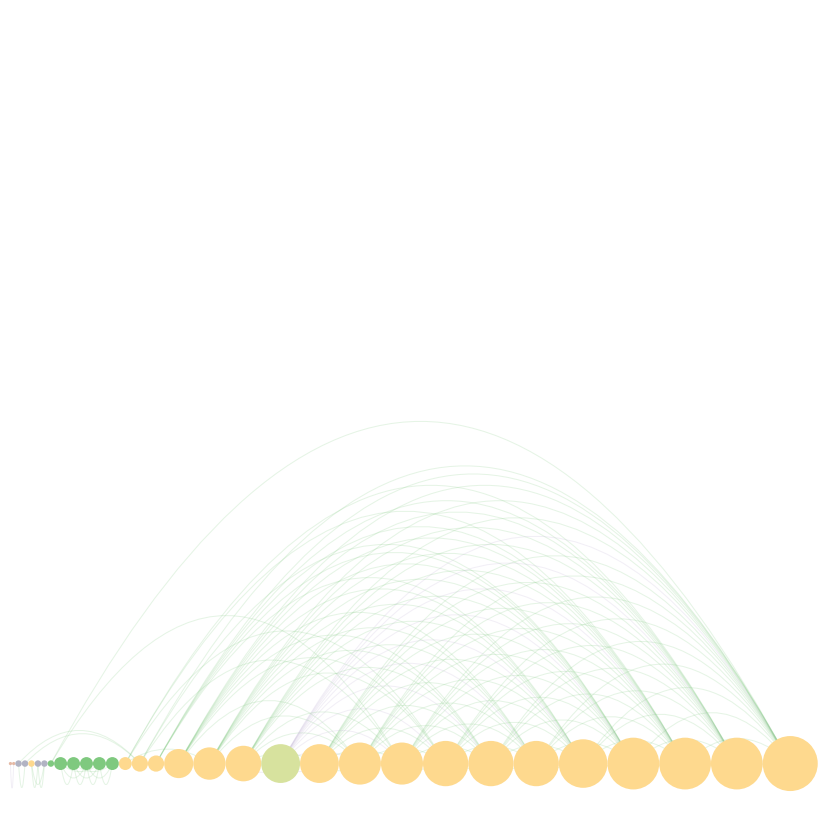

In [18]:
## Final ArcPlot with colors for asser categories
a2 = nv.ArcPlot(G4, figsize=(15, 15), node_order = 'degree', 
                node_labels = True, node_color = 'category', node_size = 'degree', edge_color = 'color')
a2.draw()

The CircosPlot is improved by adding colors to the nodes based on categories explored above, color of edges show correlations. This is done to visualize the relationship between the connectivity and the sorted (or grouped) property.


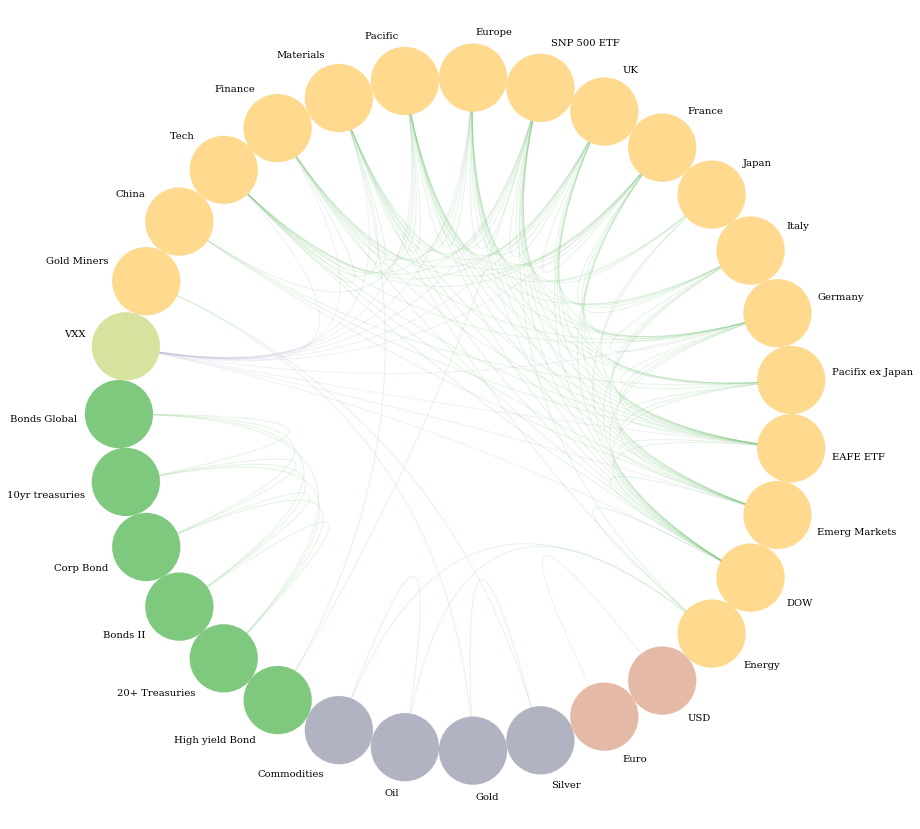

In [19]:
## Final CircosPlot
c2 = nv.CircosPlot(G4, figsize=(15, 15), node_order = 'category', 
                   node_labels = True, node_color = 'category', edge_color = 'color')
c2.draw()

### Conclusion
This project aimed to explore and visualise a network of different asset price correlation so as to learn which assets are tied and pegged against other assets. Throughout the project various plots are created, starting with a correlation matrix and clustermap to quickly visualise their relation. From there NetworkX graphs are created and improved to declutter the inital images and draw further inference. This was completed by changing edge colors to logical mappings (red for negatively correlated assets, green for positively correlated assets) and the thickness of their edges was scaled in relation to the strength of the correlation. The networks were also plotted using nxviz, to gain practise with the module and to display the networks in other types of graphical layouts.

Further work would involve looking at the at the rolling asset correlations over a shorter timeframe and see how these may have changed over time and how this then affects the network layout and clusters. By doing this one could identify the assets that are not following the market trend, and from here explore why these assets are not behaving how others are. 
It would be interesting to add the crypto currency market, large players, like Bitcoin and secondary players to see possible correlations and trends with digital currencies. 

### Further Reading
#### Network Analysis of the Stock Market
http://snap.stanford.edu/class/cs224w-2015/projects_2015/Network_Analysis_of_the_Stock_Market.pdf

#### NetworkX
https://networkx.github.io/documentation/networkx-1.9.1/

#### nxviz
https://nxviz.readthedocs.io/en/latest/index.html

#### Minimum Spanning Tree Application in the Currency Market
https://www.nbs.sk/_img/Documents/_PUBLIK_NBS_FSR/Biatec/Rok2013/07-2013/05_biatec13-7_resovsky_EN.pdf